Data contains:

TV promotion budget (in million)

Social Media promotion budget (in million)

Radio promotion budget (in million)

Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer

Sales (in million)

In [27]:
#Prvo učitavamo potrebne biblioteke za rešavanje problema linearne regresije
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare, anderson

In [53]:
#Prvi korak jeste učitavanje dataset-a
baza = pd.read_csv('Dummy Data HSS-1.csv')

In [29]:
#Vršimo pregled prvih pet instanci našeg dataset-a kako bismo imali pregled podataka
baza.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [30]:
#I takođe vršimo pregled poslednjih pet instanci našeg dataset-a
baza.tail()

,TV,Radio,Social Media,Influencer,Sales
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411
4571,42.0,15.966688,5.046548,Micro,148.202414


In [32]:
#Naredni korak jeste upoznavanje sa osnovnim podacima o dataset-u
baza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [33]:
#Provera veličine dataset-a
baza.shape

(4572, 5)

In [54]:
#Provera postojanja nultih vrednosti
baza.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

Pošto u našem skupu podataka postoje nulte vrednosti imamo dve opcije: prva je da odbacimo sve nedostajuće vrednosti koje imamo što znači eliminisanje ukupno 10 instanci iz modela; druga opcija jeste da vršimo imputaciju, to jest zamenu nultih vrednosti ili prosečnom vrednošću (ukoliko je raspodela normalna) ili medijalnom vrednošću (ako raspodela nije normalna).

In [22]:
def normality_check(column):
  data = baza[column]
  result = anderson(data)
  print("Normality check for feature: " + column)
  print('Statistic:%5f'% result.statistic)
  p=0
  for i in range(len(result.critical_values)):
      sl,cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
          print('%5f: %5f, Podaci su normalno rasporedjeni (ne mozemo odbaciti H0)' %(sl, cv))
      else:
          print('%5f: %5f, Podaci nisu normalno rasporedjeni ( odbacujemo H0)' %(sl, cv))
  print("")

columns = ['TV', 'Radio', 'Social Media', 'Sales']
for column in columns:
  normality_check(column)

Normality check for feature: TV
Statistic:  nan
15.000000: 0.575000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
10.000000: 0.655000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
5.000000: 0.786000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
2.500000: 0.917000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
1.000000: 1.091000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)

Normality check for feature: Radio
Statistic:  nan
15.000000: 0.575000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
10.000000: 0.655000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
5.000000: 0.786000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
2.500000: 0.917000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
1.000000: 1.091000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)

Normality check for feature: Social Media
Statistic:  nan
15.000000: 0.575000, Podaci nisu normalno rasporedjeni ( odbacujemo H0)
10.000000: 0.655000, Podaci nisu normalno rasporedjeni 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


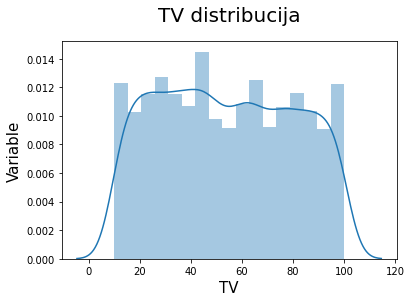

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


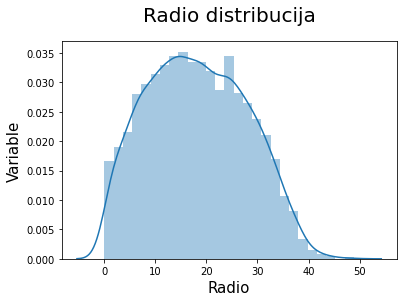

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


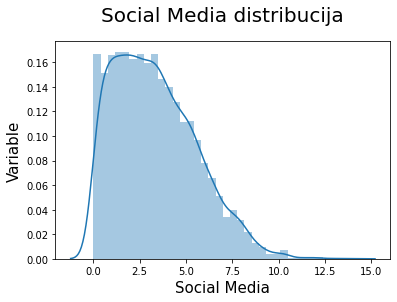

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


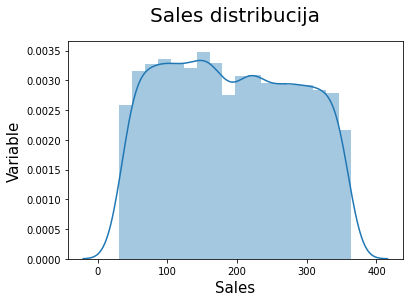

In [26]:
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
  #Create the distplot
  ax=sns.distplot(x = baza[column], kde=True)

  #Add labels to the plot
  ax.set_xlabel(column, fontsize=15)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' distribucija', fontsize=20, pad=20)

  plt.show()

In [55]:
baza2 = baza.dropna(axis = 0)

In [56]:
baza2

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


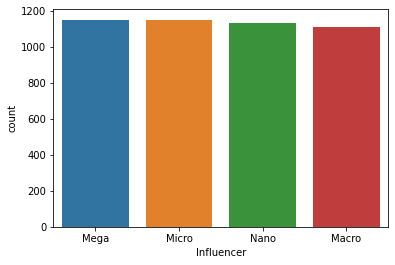

In [46]:
sns.countplot(baza2['Influencer'])

<function matplotlib.pyplot.show>

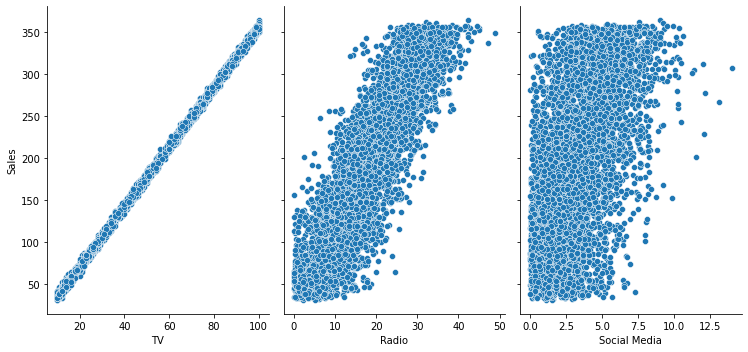

In [48]:
sns.pairplot(baza2.head(4546), x_vars=['TV', 'Radio', 'Social Media'],
                          y_vars='Sales',height=5, aspect=0.7, kind='scatter')
plt.tight_layout()
plt.show

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
InfluencerLE = le.fit_transform(baza2['Influencer'])

In [72]:
baza2

,TV,Radio,Social Media,Sales,Influencer
0,16.0,6.566231,2.907983,54.732757,1
1,13.0,9.237765,2.409567,46.677897,1
2,41.0,15.886446,2.913410,150.177829,1
3,83.0,30.020028,6.922304,298.246340,1
4,15.0,8.437408,1.405998,56.594181,2
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,2
4568,71.0,20.610685,6.545573,249.101915,3
4569,44.0,19.800072,5.096192,163.631457,2
4570,71.0,17.534640,1.940873,253.610411,0


In [62]:
baza2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Sales         4546 non-null   float64
 4   Influencer    4546 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 213.1 KB


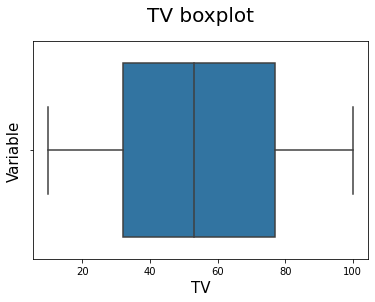

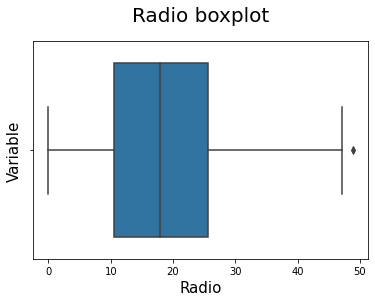

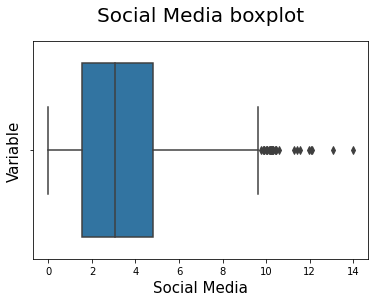

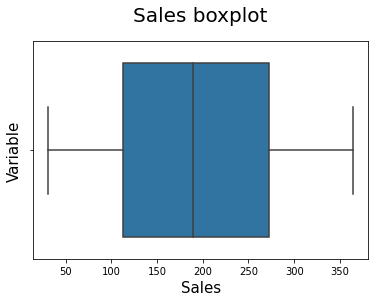

In [64]:
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
  #Create the boxplot
  ax=sns.boxplot(x = baza2[column])

  #Add labels to the plot
  ax.set_xlabel(column, fontsize=15)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' boxplot', fontsize=20, pad=20)

  plt.show()

In [67]:
#Function for outliers detection
#Function for outliers detection
def outliers_detection(baza2_input, column):
    
    baza2_lower_quartile= baza2_input[column].quantile(0.25)
    baza2_uper_quartile= baza2_input[column].quantile(0.75)


    #Extract the inter quantile range
    baza2_iqr= baza2_uper_quartile - baza2_lower_quartile

    #Get the upper and lower bounds
    lower_bound_up= baza2_uper_quartile + 1.5*baza2_iqr
    upper_bound_up= baza2_uper_quartile + 3*baza2_iqr

    #Get the upper and lower bounds
    upper_bound_down= baza2_lower_quartile - 1.5*baza2_iqr
    lower_bound_down= baza2_lower_quartile - 3*baza2_iqr

    #Extract values outside the upper bound
    baza2_outliers_current= baza2_input[(baza2_input[column] > upper_bound_up) | (baza2_input[column] < lower_bound_down)]
    baza2_input = baza2_input[(baza2_input[column] <= upper_bound_up) & (baza2_input[column] >= lower_bound_down)]

    baza2_outliers_current['variable']=column
    return baza2_input, baza2_outliers_current

baza2_cleaned=baza2
baza2_outliers = pd.DataFrame()
num_varijable = ['TV', 'Radio', 'Social Media', 'Sales']
for column in num_varijable:
    baza2_cleaned, baza2_outliers_temp = outliers_detection(baza2_cleaned, column)
    baza2_outliers = baza2_outliers.append(baza2_outliers_temp)
#%%
baza2_outliers


,TV,Radio,Social Media,Sales,Influencer,variable


Rezultati su pokazali da nema pravih otulier-a tako da mozemo nastaviti sa analizom

In [68]:
baza2.shape

(4546, 5)

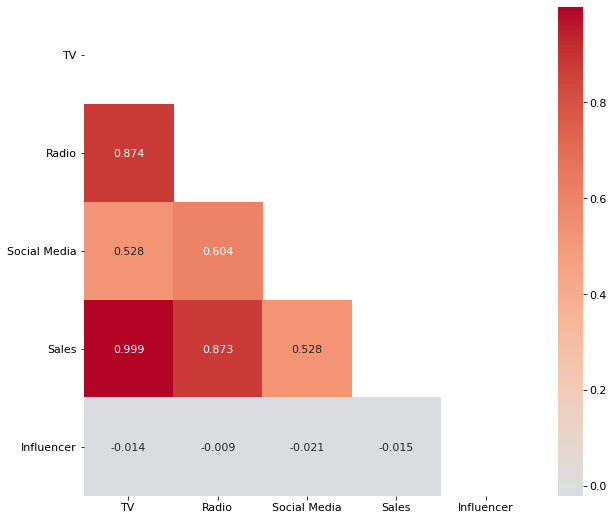

In [73]:
# Matrica korelacije
import matplotlib
correlations = baza2.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":11}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

Na osnovu trougaone matrice korelacije vidimo da izmedju varijable Sales i TV postoji skoro pa savrsena korelacija, sto znaci da je kretanje varijable Sales u potpunosti definisano kretanjem varijable TV. Sto se tice ostalih varijabli izmedju varijable Sales i Radio postoji jaka direktna korelacija, a izmedju varijable Sales i Social Media postoji umerena direktna korelacija. Sto se tice varijable Influencer, iako je njen pravac kretanja inverzan kretanju ostalih varijabli a narocito zavisne varijable Sales, vrednost koeficijenta je veoma mala da bi bila uzeta u obzir prilikom gradjenja modela.

In [74]:
#Izgradnja linearnog regresionog modela

X = baza2.drop(columns = ['Influencer', 'Sales'], axis = 1)
y = baza2[['Sales']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred_lr = lr.predict(X_test)

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error
import math
from sklearn import metrics

print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_lr))
print("R2_sccore =",r2_score(y_test, y_pred_lr))

Root Mean Squared Error:  3.0017772974321093
Mean Absolute Error:  2.41736159457942
R2_sccore = 0.9989658408469502


In [84]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: [-0.14496668]
slope: [[ 3.56638938 -0.0157049   0.01046961]]


Medjutim, iako ovaj prvi model ima i vise nego dobre rezultate, ono sto je ocigledno jeste da je zbog koeficijenta Sales u potpunosti odredjena varijablom TV. Sto znaci da nam ostale varijable nisu potrebne pa se model visestruke regresije svodi na problem linearne regresije!

In [86]:
X2 = baza2[['TV']]
y2 = baza2[['Sales']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 1)


In [87]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [89]:
y2_pred_lr = lr2.predict(X2_test)

In [90]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y2_test, y2_pred_lr)))
print('Mean Absolute Error: ', mean_absolute_error(y2_test, y2_pred_lr))
print("R2_sccore =",r2_score(y2_test, y2_pred_lr))

Root Mean Squared Error:  2.998430435508499
Mean Absolute Error:  2.4149237582372844
R2_sccore = 0.9989681456537405


In [91]:
print('intercept:', lr2.intercept_)
print('slope:', lr2.coef_)

intercept: [-0.1470831]
slope: [[3.56178889]]
